In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
gaze_df = pd.read_csv('gaze_log_test.csv')

In [89]:
def convert_to_list(s):
    return eval(s)
gaze_df['left_eye_from_center'] = gaze_df['left_eye_from_center'].apply(convert_to_list) 
gaze_df['right_eye_from_center'] = gaze_df['right_eye_from_center'].apply(convert_to_list) 
gaze_df['left_eye_dim'] = gaze_df['left_eye_dim'].apply(convert_to_list) 
gaze_df['right_eye_dim'] = gaze_df['right_eye_dim'].apply(convert_to_list)

print(gaze_df.dtypes)

left_eye_from_center      object
right_eye_from_center     object
time_start               float64
time_end                 float64
left_eye_dim              object
right_eye_dim             object
dtype: object


Eye position:
Where the pupil is relative to the whole eye |---o---| = 50%

In [90]:
def calculate_eye_position(row, eye='right'):
    eye_from_center = row[f'{eye}_eye_from_center'] 
    eye_dim = row[f'{eye}_eye_dim']

    x_position = (float(eye_dim[0]/2) +float(eye_from_center[0])) / float(eye_dim[0]) * 100
    y_position = (float(eye_dim[1]/2) +float(eye_from_center[1])) / float(eye_dim[1]) * 100
    return (x_position, y_position)

In [91]:
gaze_df['right_eye_pos'] = gaze_df.apply(calculate_eye_position, axis=1, eye='right')
gaze_df['left_eye_pos'] = gaze_df.apply(calculate_eye_position, axis=1, eye='left')

gaze_df = gaze_df.drop(['right_eye_from_center', 'left_eye_from_center', 'right_eye_dim', 'left_eye_dim'], axis=1)
#gaze_df.head

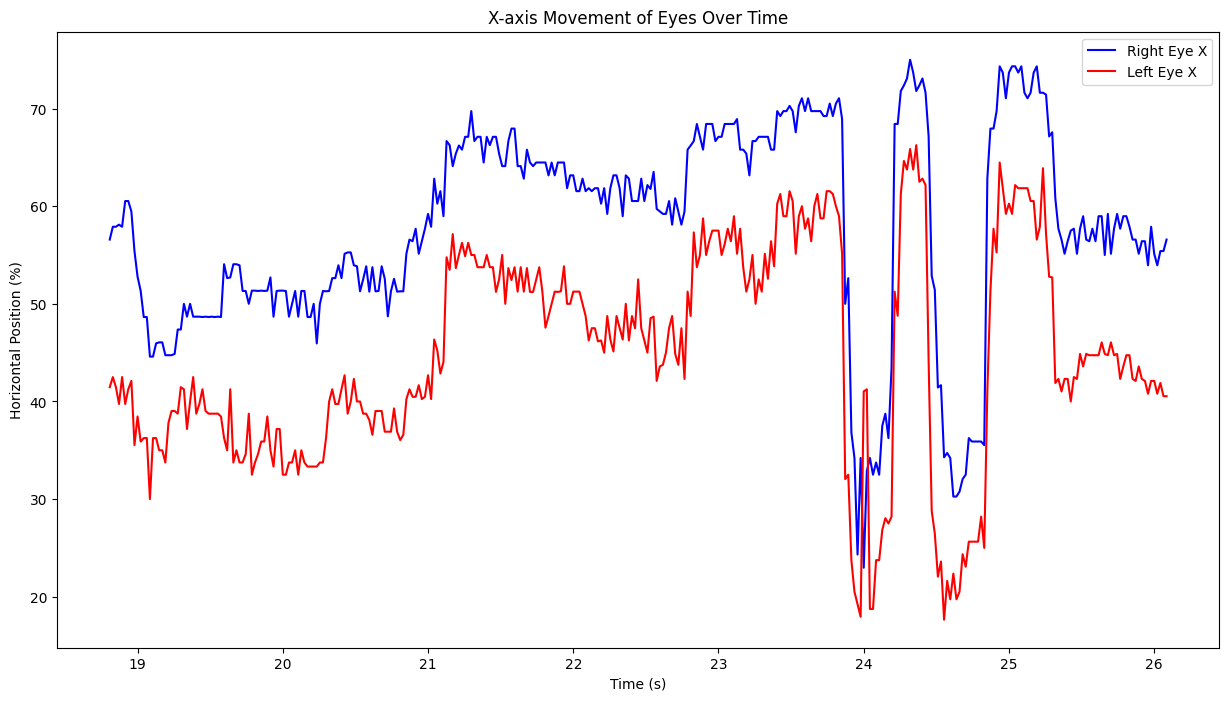

In [92]:
# Extract time data
time = gaze_df['time_start']

# Extract x-axis positions for both eyes
right_eye_x = [pos[0] for pos in gaze_df['right_eye_pos']]
left_eye_x = [pos[0] for pos in gaze_df['left_eye_pos']]

# Create figure with one subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot right eye x-axis movement
ax.plot(time, right_eye_x, label='Right Eye X', color='blue')

# Plot left eye x-axis movement
ax.plot(time, left_eye_x, label='Left Eye X', color='red')

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position (%)')
ax.set_title('X-axis Movement of Eyes Over Time')
ax.legend()

plt.show()


Blink Rates and Blink Durations

In [93]:
blink_df = pd.read_csv('blink_log_test.csv')

<BarContainer object of 4 artists>

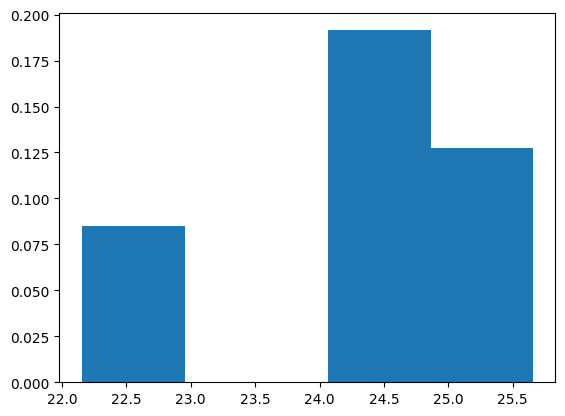

In [94]:
plt.bar(blink_df['start_time'], blink_df['duration'])

In [95]:
blink_df['interval'] = (blink_df['start_time'] // 5).astype(int)
blink_rate_per_interval = blink_df.groupby('interval').size().reset_index(name='blink_rate')

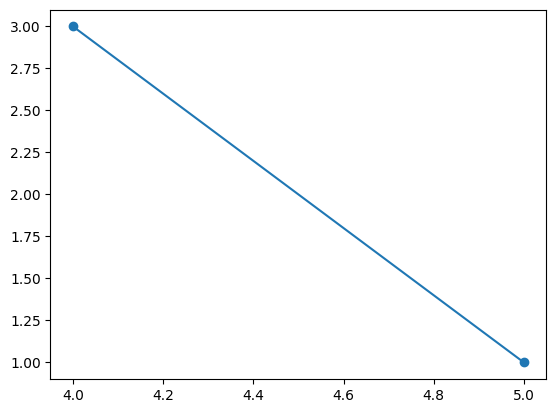

In [96]:
plt.plot(blink_rate_per_interval['interval'], blink_rate_per_interval['blink_rate'], marker='o', linestyle='-')